In [9]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

news = pd.read_csv(r"D:\TFG\tfg_git\data\news\news3_v2.csv")
mails = pd.read_csv(r"D:\TFG\tfg_git\data\mails\corpus_v2.0.csv")

In [10]:
counter_df_unit = pd.DataFrame(news, columns=["Biden", "Sanders","Warren","Bloomberg", "Buttigieg"])

In [11]:
print(len(news))
print(len(mails))

26501
668


In [16]:
authors = counter_df_unit.applymap(lambda x: 1 if x > 0 else x).sum()
dff = pd.DataFrame(authors, columns=["news"])
dff["mails"] = [159, 108, 131, 45, 225]

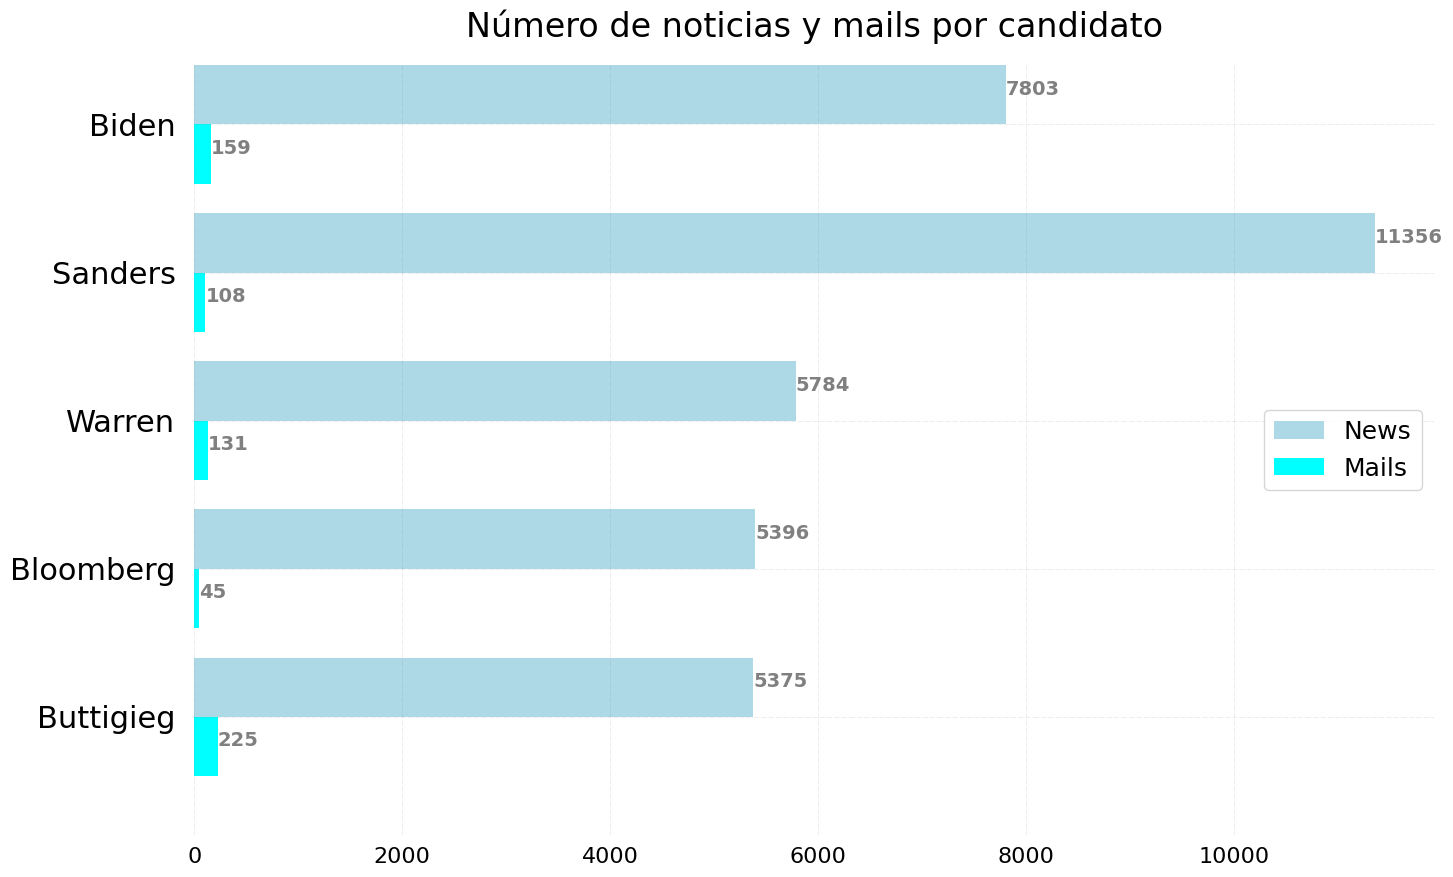

In [17]:
# Figure Size
fig, ax = plt.subplots(figsize=(16, 10))

ind = np.arange(len(dff))
width = 0.4

# Horizontal Bar Plot
ax.barh(ind, dff.news, width, color='lightblue', label='News')
ax.barh(ind + width, dff.mails, width, color='aqua', label='Mails')

ax.set(yticks=ind + 0.2, yticklabels=dff.index.tolist(), ylim=[2*width - 1, len(dff)])
ax.legend()

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width() + 0.40, i.get_y() + 0.2, str(round((i.get_width()), 2)),
             fontsize=14, fontweight='bold', color='grey')

ax.set_title("Número de noticias y mails por candidato", y=1, fontsize=24, pad=20)  # Aumenta el tamaño del título

# Aumenta el tamaño de letra de los nombres de cada barra del eje y
ax.set_yticklabels(dff.index.tolist(), fontsize=22)
ax.tick_params(axis='x', labelsize=16)

# Add Text watermark
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize=12,
#          color='grey', ha='right', va='bottom',
#          alpha=0.7)
ax.legend(loc='center right', bbox_to_anchor=(1, 0.5), fontsize=18)  # Aumenta el tamaño de la leyenda

# Show Plot
plt.show()


In [18]:
fig.savefig('countplot_corpus.jpg', dpi=600)


In [61]:
dff.news

Biden        6738
Sanders      7769
Warren       4635
Bloomberg    2115
Buttigieg    4549
Name: news, dtype: int64

In [62]:
lens_news = []
lens_mails = []

for i in news.text: 
    lens_news.append(len(i.split()))

for i in mails.body_text: 
    lens_mails.append(len(i.split()))

In [63]:
print(sum(lens_news)/len(lens_news))
print(sum(lens_mails)/len(lens_mails))

1073.4846609561903
366.49251497005986


In [64]:
news.site.value_counts()

yahoo.com             1207
usnews.com            1113
rawstory.com           744
medium.com             363
breitbart.com          338
                      ... 
state.pa.us              1
king5.com                1
fox5ny.com               1
usembassy.gov            1
thenewstribune.com       1
Name: site, Length: 1188, dtype: int64